# TRABAJO INTEGRADOR - PROCESAMIENTO DIGITAL DE IMÁGEN

## Ejercicio 1: Espacios de Color

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado
OpenCV carga las imágenes en formato BGR (Blue-Green-Red) por defecto, en vez de RGB como otras librerías. Lo primero será importar las librerías necesarias, cargar la imagen y mostrar los canales por separado.

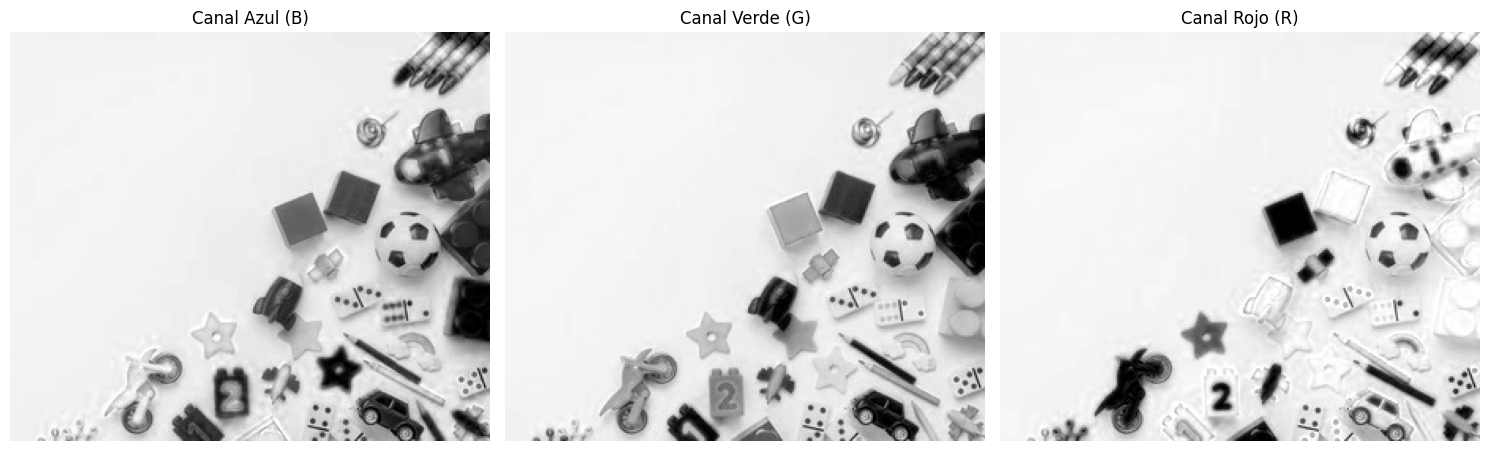

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en BGR
imagen_bgr = cv2.imread('/content/drive/MyDrive/Procesamiento/toys.jpg')

# Separar canales B, G y R
B, G, R = cv2.split(imagen_bgr)

# Mostrar los canales por separado
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(B, cmap='gray')
axs[0].set_title('Canal Azul (B)')
axs[1].imshow(G, cmap='gray')
axs[1].set_title('Canal Verde (G)')
axs[2].imshow(R, cmap='gray')
axs[2].set_title('Canal Rojo (R)')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()


Explicación:
cv2.imread: Carga la imagen en formato BGR.

cv2.split: Separa la imagen en sus 3 canales.

matplotlib.pyplot.imshow: Usamos esta función para mostrar cada canal como imagen en escala de grises.

cmap='gray': Así visualizamos los canales en escala de intensidad, lo que es útil para análisis.

¿Por qué se hace esto?

Separar los canales nos permite ver cómo cada componente de color contribuye a la imagen total. Como cada canal es una matriz de intensidades, visualizarlos en escala de grises muestra su distribución.

##b) Identificar el canal con mayor información usando el promedio de intensidades

Vamos a calcular el promedio de cada canal. Un valor más alto podría indicar que ese canal domina en la imagen.

In [22]:
prom_B = np.mean(B)
prom_G = np.mean(G)
prom_R = np.mean(R)

print(f"Promedio Azul (B): {prom_B:.2f}")
print(f"Promedio Verde (G): {prom_G:.2f}")
print(f"Promedio Rojo (R): {prom_R:.2f}")


Promedio Azul (B): 206.35
Promedio Verde (G): 210.95
Promedio Rojo (R): 224.56


Explicación:
El promedio indica qué tan “brillante” es cada canal en promedio. El canal con el valor más alto tiene mayor información luminosa en esta imagen.

##c) Convertir de BGR a RGB y mostrar por qué cambia la visualización

Cuando usamos cv2.imread, la imagen está en BGR. matplotlib.pyplot.imshow() espera RGB, por eso se ve mal si no convertimos.

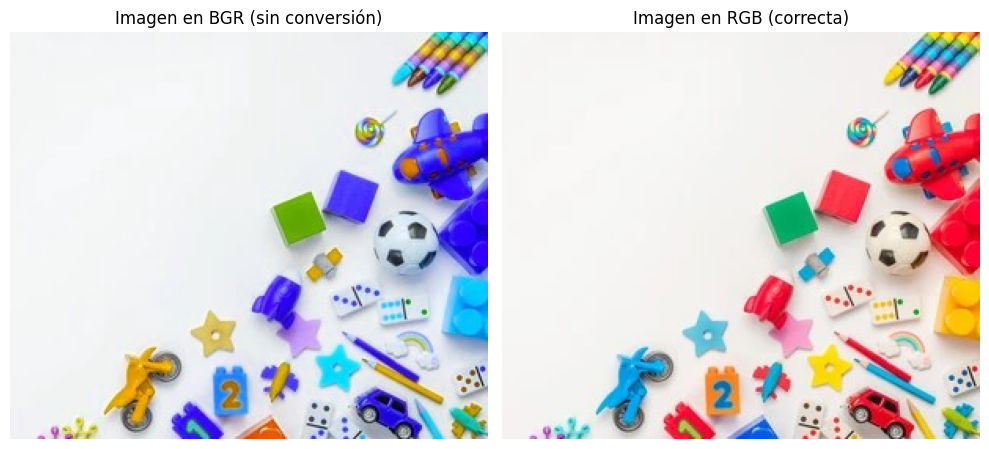

In [23]:
# Convertir BGR a RGB
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Mostrar ambas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_bgr)  # Se verá con colores alterados
plt.title('Imagen en BGR (sin conversión)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb)  # Correcto
plt.title('Imagen en RGB (correcta)')
plt.axis('off')

plt.tight_layout()
plt.show()


¿Por qué se ven diferentes?

Matplotlib espera que el orden de los canales sea RGB, así que si mostramos una imagen BGR, los colores quedan mezclados (azules en lugar de rojos, etc.).

##Ejercicio 2: Muestreo y Cuantización

a) Aplicar MUESTREO ESPACIAL (Dowsampling) con factores de 2, 4 y 8

El muestreo espacial consiste en reducir la resolución de una imagen. En Python con OpenCV, podemos hacerlo con cv2.resize() usando un factor de escala.

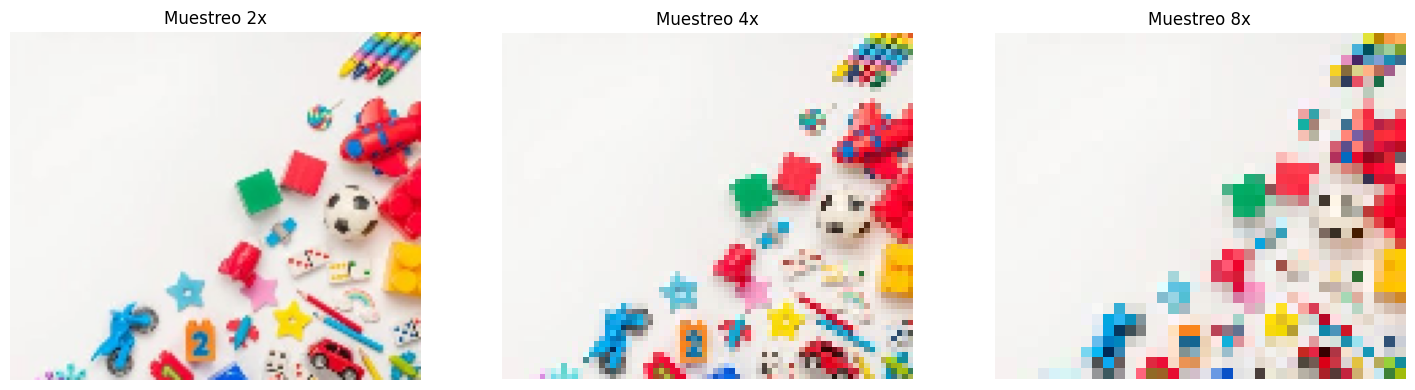

In [26]:

# Función para aplicar muestreo espacial
def muestreo_espacial(imagen, factor):
    """
    Reduce el tamaño de una imagen dividiendo su ancho y alto por el factor dado.
    Usa interpolación 'vecino más cercano' para mantener los colores originales sin suavizado.
    """
    alto, ancho = imagen.shape[:2]
    nueva_img = cv2.resize(imagen, (ancho // factor, alto // factor), interpolation=cv2.INTER_NEAREST)
    return nueva_img

# Aplicamos la función a distintos factores de muestreo
muestreo_2 = muestreo_espacial(imagen_rgb, 2)
muestreo_4 = muestreo_espacial(imagen_rgb, 4)
muestreo_8 = muestreo_espacial(imagen_rgb, 8)

# Visualizamos los resultados
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, (muestreo, factor) in enumerate(zip([muestreo_2, muestreo_4, muestreo_8], [2, 4, 8])):
    axs[i].imshow(muestreo)
    axs[i].set_title(f"Muestreo {factor}x")
    axs[i].axis('off')
plt.show()


¿Por qué usamos cv2.resize()?

Porque permite cambiar el tamaño de la imagen con diferentes métodos de interpolación.

INTER_NEAREST es el más básico y rápido: copia el píxel más cercano (no suaviza).

Ventaja: más real para ver efectos de muestreo.

Alternativas: INTER_LINEAR (suaviza un poco), INTER_AREA (bueno para reducir).

Acá creé una función muestreo_espacial() que toma una imagen y un factor de reducción. La función utiliza cv2.resize() con interpolación INTER_NEAREST, que es la más simple y rápida. Esto permite visualizar cómo se pierden detalles al reducir resolución, sin que se suavicen los colores como lo haría INTER_LINEAR.

Después, aplico esa función con factores 2, 4 y 8 para mostrar cómo va cambiando la imagen. Y finalmente muestro todas en una grilla usando matplotlib, lo que permite comparar visualmente el efecto del muestreo.

##Cálculo de Reducción

Queremos saber cuánto tamaño se reduce en cada caso.

In [30]:
def calcular_reduccion(original, reducida):
    alto_o, ancho_o = original.shape[:2]
    alto_r, ancho_r = reducida.shape[:2]
    total_original = alto_o * ancho_o
    total_reducido = alto_r * ancho_r
    porcentaje = 100 * (1 - total_reducido / total_original)
    return (alto_r, ancho_r), porcentaje

# Mostrar reducción para cada factor
factores = [2, 4, 8]
muestreadas = [muestreo_2, muestreo_4, muestreo_8]

for factor, img_m in zip(factores, muestreadas):
    nuevo_tam, reduccion = calcular_reduccion(imagen_rgb, img_m)
    print(f"Muestreo {factor}x → Tamaño nuevo: {nuevo_tam}, Reducción: {reduccion:.2f}%")


Muestreo 2x → Tamaño nuevo: (129, 152), Reducción: 75.10%
Muestreo 4x → Tamaño nuevo: (64, 76), Reducción: 93.82%
Muestreo 8x → Tamaño nuevo: (32, 38), Reducción: 98.46%


##c) Aplicar cuantización con 4 niveles: 32, 64, 128, 256
La cuantización reduce la cantidad de niveles de color. En imágenes, esto significa limitar los valores posibles de cada canal.

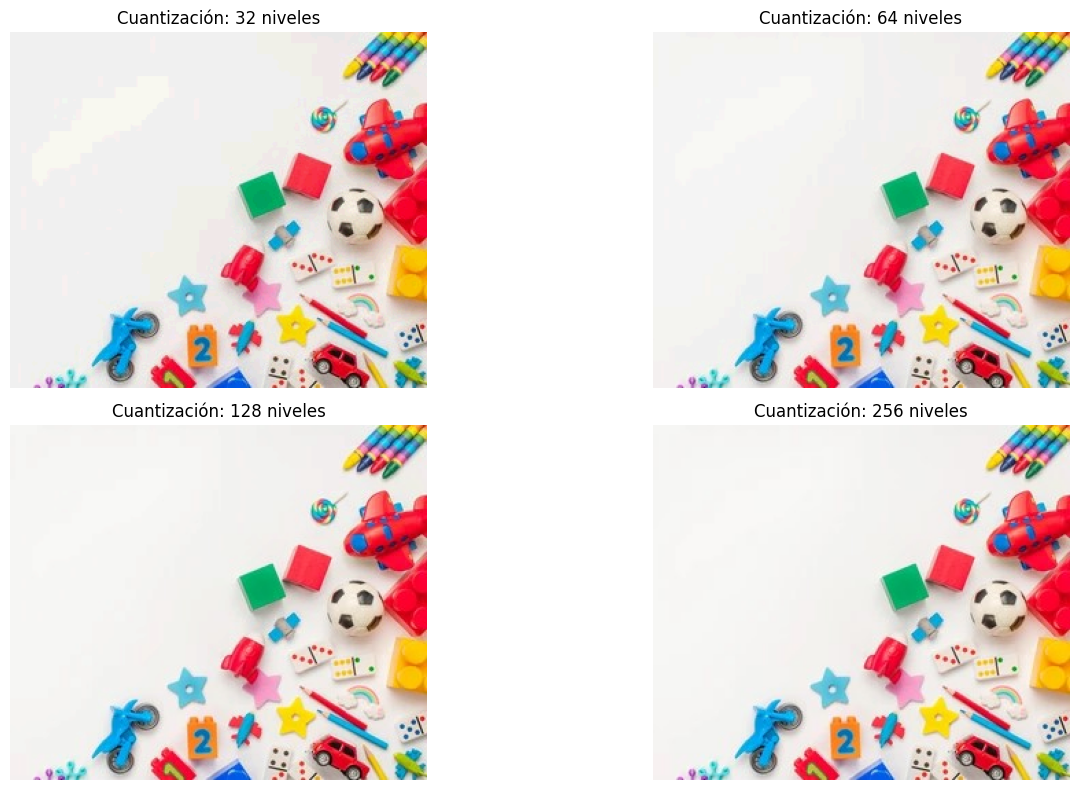

In [29]:
# Cuantización de una imagen RGB
def quantize_image(image, levels):
    step = 256 // levels
    quantized = (image // step) * step
    return quantized.astype(np.uint8)

levels = [32, 64, 128, 256]
quantized_images = [quantize_image(img_rgb, lvl) for lvl in levels]

# Mostrar
plt.figure(figsize=(15, 8))
for i, lvl in enumerate(levels):
    plt.subplot(2, 2, i+1)
    plt.imshow(quantized_images[i])
    plt.title(f"Cuantización: {lvl} niveles")
    plt.axis("off")

plt.tight_layout()
plt.show()


Explicación:
Cuantizamos dividiendo cada valor de píxel y luego multiplicándolo para que caiga en un "rango fijo".

256 // levels: define el tamaño del paso entre niveles.

image // step * step: redondea hacia abajo al múltiplo más cercano de ese paso.

##d) ¿En qué nivel se nota la degradación?
Esta respuesta es subjetiva y depende del contenido. Para esta imagen con muchos colores brillantes, notarás:

A partir de 32 o 64 niveles ya empieza a verse la pérdida de detalle y bandas de color.

En 128 y 256 se mantiene bastante bien visualmente.

##Ejercicio 3: Segmentación por Color
a) Extraer objetos de un color específico usando umbrales RGB
Vamos a segmentar por color. Supongamos que queremos detectar los objetos rojos (hay varios juguetes de ese color en la imagen).

Usamos cv2.inRange() para definir un rango de color (umbral) y obtener una máscara binaria donde se marca lo que está dentro del rango.

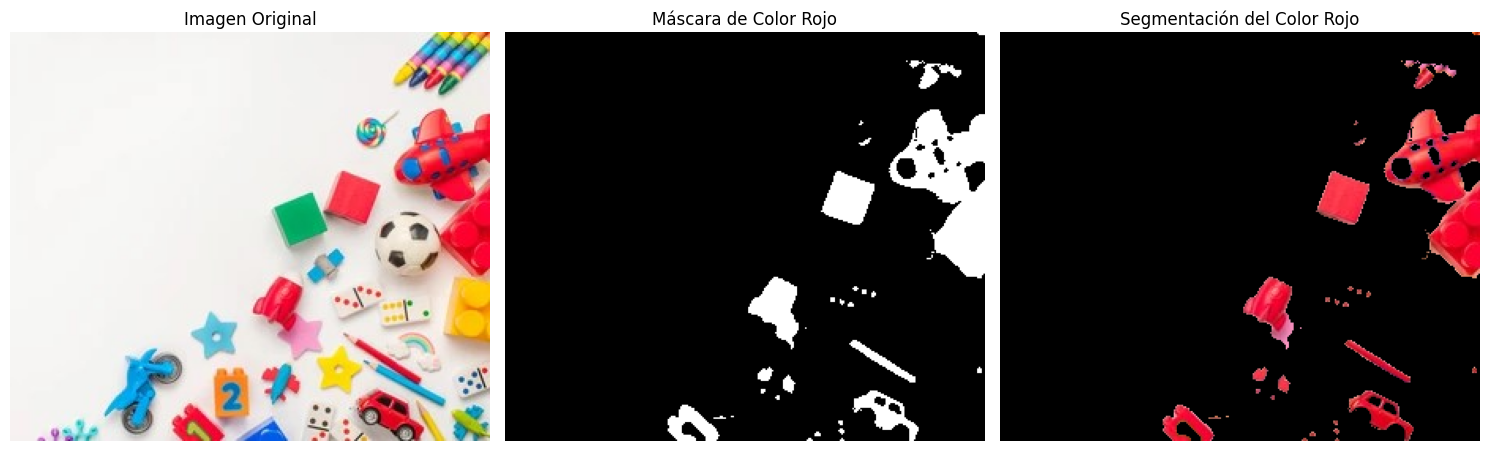

In [31]:
# Convertir la imagen de RGB a formato HSV para segmentar mejor
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Definir el rango para el color rojo (en HSV)
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([179, 255, 255])

# Máscara combinando los dos rangos (rojo está al inicio y final del círculo HSV)
mask1 = cv2.inRange(img_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(img_hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask1, mask2)

# Aplicar la máscara a la imagen original
segmented = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)

# Mostrar
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_red, cmap='gray')
plt.title("Máscara de Color Rojo")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented)
plt.title("Segmentación del Color Rojo")
plt.axis('off')

plt.tight_layout()
plt.show()


Explicación:

Trabajamos en HSV (Hue, Saturation, Value) porque separar colores es más fácil ahí.

El rojo es especial: aparece en dos zonas del círculo de color, por eso usamos dos rangos y los combinamos.

La máscara es una imagen en blanco y negro donde blanco = color detectado.

##b) Calcular y mostrar el histograma en escala de grises
Primero convertimos a escala de grises y luego graficamos el histograma.

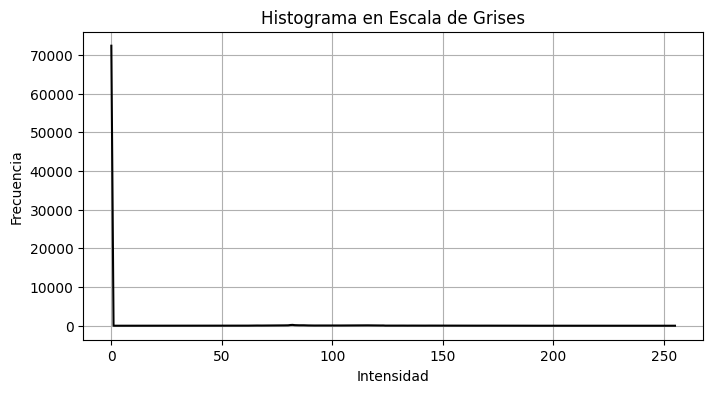

In [32]:
# Convertimos la imagen segmentada a escala de grises
gray = cv2.cvtColor(segmented, cv2.COLOR_RGB2GRAY)

# Calcular histograma
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Mostrar histograma
plt.figure(figsize=(8, 4))
plt.plot(hist, color='black')
plt.title("Histograma en Escala de Grises")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


¿Qué está pasando?

La imagen segmented que estás convirtiendo a escala de grises contiene mucho negro (valor 0), porque solo deja pasar los píxeles del color rojo detectado. El resto está en negro (0,0,0). Al convertir eso a escala de grises, se queda como valor 0, que se acumula fuertemente en el histograma.

Por eso:

Valor 0 tiene frecuencia altísima.

El resto de los valores tiene muy poca presencia.

Opción 1:

Calcular histograma solo de los píxeles "segmentados"

En vez de graficar todo, solo tomás los píxeles donde la máscara detectó rojo (máscara > 0):

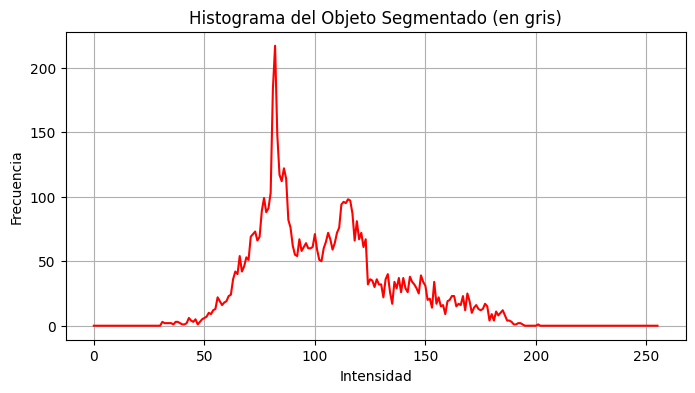

In [36]:
# Extraer los valores de gris donde la máscara es distinta de cero
valores_segmentados = gray[mask_red > 0]

# Calcular histograma solo con esos valores
hist = cv2.calcHist([valores_segmentados], [0], None, [256], [0, 256])

# Mostrar
plt.figure(figsize=(8, 4))
plt.plot(hist, color='red')
plt.title("Histograma del Objeto Segmentado (en gris)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


Opción 2:

Mostrar histograma en log escala

Esto puede ayudarte a visualizar también los valores bajos cuando hay un pico dominante:

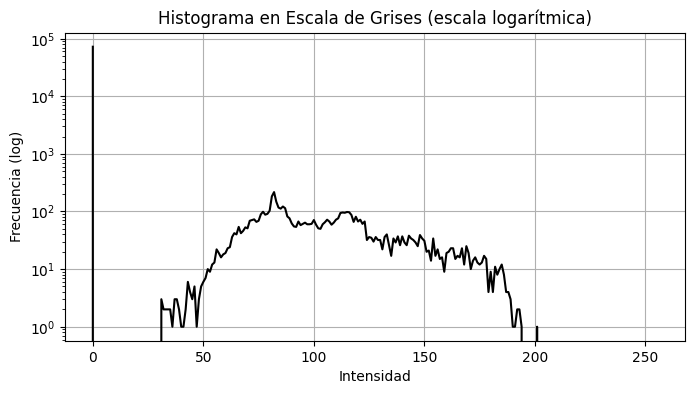

In [35]:
plt.figure(figsize=(8, 4))
plt.semilogy(hist, color='black')  # Escala logarítmica
plt.title("Histograma en Escala de Grises (escala logarítmica)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia (log)")
plt.grid(True)
plt.show()


##Conclusión: Análisis del Histograma de la Imagen Segmentada

Al segmentar objetos por color (en este caso, objetos rojos) y luego calcular su histograma en escala de grises, se presentan dos formas complementarias de análisis:

Opción 1 – Histograma del Objeto Segmentado (sin fondo)
En esta opción se calcula el histograma solo de los píxeles correspondientes al objeto segmentado, es decir, aquellos donde la máscara es diferente de cero.

🔍 Ventajas:

El histograma muestra con claridad la distribución real de intensidades del objeto segmentado.

Podemos observar qué niveles de gris predominan en el objeto.

Se eliminan los valores del fondo (negros), que distorsionaban el análisis.

📌 Conclusión:

Esta opción permite un análisis más preciso del objeto, ideal para tareas de reconocimiento o clasificación de colores segmentados.

Opción 2 – Histograma Completo en Escala Logarítmica
Aquí se muestra el histograma de toda la imagen segmentada, incluyendo el fondo negro, pero usando una escala logarítmica en el eje Y.

🔍 Ventajas:

Aunque el fondo negro (intensidad 0) domina en cantidad, la escala logarítmica permite visualizar también las intensidades menos frecuentes.

Sirve para detectar la presencia de múltiples regiones con diferentes niveles de gris, sin que un pico distorsione la vista global.

📌 Conclusión:

Esta visualización es útil cuando no se quiere perder ninguna información del conjunto total, aunque la imagen esté dominada por una intensidad específica.



##En resumen, si nuestro objetivo es estudiar únicamente el objeto segmentado, es más útil eliminar el fondo y analizar su histograma directamente. En cambio, si queremos ver cómo se distribuyen todas las intensidades en la imagen segmentada, sin perder detalle por picos dominantes, la escala logarítmica es una excelente herramienta visual.

##c) Coordenadas del rectángulo que encierra el objeto segmentado
Usamos cv2.findContours para detectar formas, luego el bounding box más simple.

In [33]:
# Encontrar contornos en la máscara
contours, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar el bounding box más grande (por área)
if contours:
    biggest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(biggest)
    print(f"Coordenadas del rectángulo: x={x}, y={y}, ancho={w}, alto={h}")


Coordenadas del rectángulo: x=243, y=49, ancho=61, alto=107


Explicación:

cv2.boundingRect: Devuelve (x, y, ancho, alto) del rectángulo que encierra el objeto.

Muy útil para hacer detección de objetos o preparar datos para IA.

##d) Dibujar los bordes del objeto segmentado en rojo
Vamos a superponer los contornos sobre la imagen original.

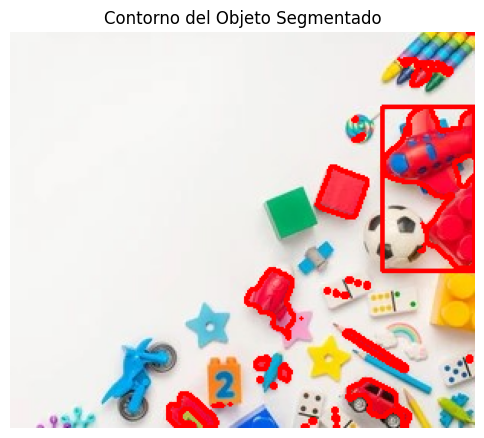

In [34]:
# Dibujar contornos sobre una copia de la imagen original
img_contornos = img_rgb.copy()
cv2.drawContours(img_contornos, contours, -1, (255, 0, 0), 2)  # Azul en RGB

# También dibujar el rectángulo más grande
cv2.rectangle(img_contornos, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Mostrar resultado
plt.figure(figsize=(6, 6))
plt.imshow(img_contornos)
plt.title("Contorno del Objeto Segmentado")
plt.axis('off')
plt.show()


Explicación:

drawContours: Traza las líneas exteriores de los objetos detectados.

(255, 0, 0) es rojo en OpenCV (recuerda que RGB se invierte cuando volvemos a BGR).

Aquí se dibujaron todos los bordes de los objetos segmentados en color rojo sobre la imagen original. Luego, para destacar el objeto más importante, se calculó el rectángulo delimitador más grande y se trazó también en rojo. Esto permite identificar la ubicación y el tamaño del objeto rojo más prominente en la escena, lo cual es útil en aplicaciones como el seguimiento de objetos o la clasificación automática.